<a href="https://colab.research.google.com/github/202218031/DM_Project_2/blob/main/202218057_DM_Course_Project_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [5]:
df=pd.read_csv("/content/smoking_driking_dataset_Ver01.csv")

In [6]:
df.head()

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,Male,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,...,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,Y
1,Male,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,...,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,N
2,Male,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,...,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,N
3,Male,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,...,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,N
4,Male,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,...,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,N


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844397 entries, 0 to 844418
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   sex               844397 non-null  object 
 1   age               844397 non-null  int64  
 2   height            844397 non-null  int64  
 3   weight            844397 non-null  int64  
 4   waistline         844397 non-null  float64
 5   sight_left        844397 non-null  float64
 6   sight_right       844397 non-null  float64
 7   hear_left         844397 non-null  float64
 8   hear_right        844397 non-null  float64
 9   SBP               844397 non-null  float64
 10  DBP               844397 non-null  float64
 11  BLDS              844397 non-null  float64
 12  tot_chole         844397 non-null  float64
 13  HDL_chole         844397 non-null  float64
 14  LDL_chole         844397 non-null  float64
 15  triglyceride      844397 non-null  float64
 16  hemoglobin        84

In [8]:
df.shape

(844420, 24)

In [9]:
df.dropna(inplace=True)

In [10]:
df.shape

(844419, 24)

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df.shape

(844397, 24)

In [19]:
df['sex'].value_counts()

Male      448498
Female    395899
Name: sex, dtype: int64

In [20]:
df.replace({'sex': {'Male': 0, 'Female': 1}}, inplace = True)
df['sex'].value_counts()

0    448498
1    395899
Name: sex, dtype: int64

In [21]:
df.replace({'DRK_YN':{'Y':1, 'N':0}}, inplace = True)
df['DRK_YN'].value_counts()

0    422414
1    421983
Name: DRK_YN, dtype: int64

In [23]:
df.groupby('DRK_YN').mean()

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,HDL_chole,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd
DRK_YN,,,,,,,,,,,,,,,,,,,,,
0,0.652732,51.654230,158.773147,59.98582,80.144801,0.934554,0.933604,1.041549,1.040512,121.950234,...,56.189707,114.565407,121.510757,13.755565,1.09557,0.831429,25.083262,24.124253,26.829913,1.321230
1,0.284789,43.574362,165.728430,66.59888,82.335097,1.027536,1.023576,1.021347,1.020444,122.910006,...,57.661804,111.479270,142.787525,14.703598,1.09276,0.889882,26.917928,27.414209,47.487242,1.895806


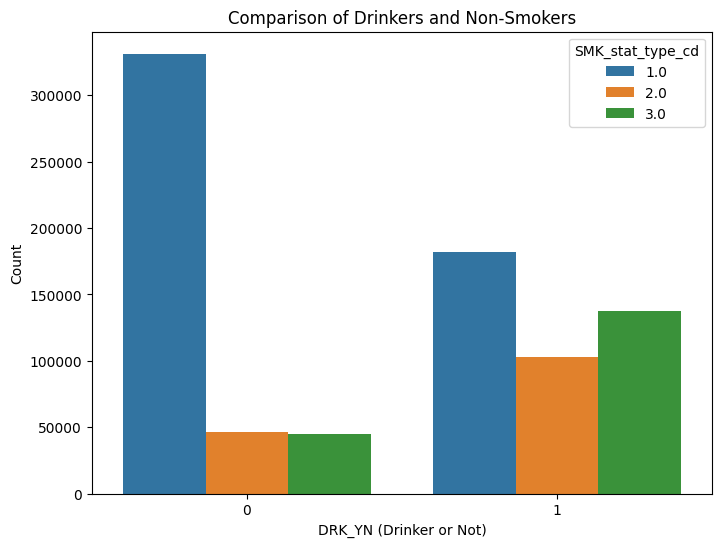

                            count       mean        std   min   25%   50%  \
DRK_YN SMK_stat_type_cd                                                     
0      1.0               331251.0  51.997986  14.454560  20.0  40.0  55.0   
       2.0                46634.0  54.313591  13.457612  20.0  45.0  55.0   
       3.0                44529.0  46.311954  13.399211  20.0  35.0  45.0   
1      1.0               181611.0  41.986196  13.243592  20.0  30.0  40.0   
       2.0               102729.0  48.229322  12.309906  20.0  40.0  50.0   
       3.0               137643.0  42.195644  11.544756  20.0  35.0  40.0   

                          75%   max  
DRK_YN SMK_stat_type_cd              
0      1.0               60.0  85.0  
       2.0               65.0  85.0  
       3.0               55.0  85.0  
1      1.0               50.0  85.0  
       2.0               55.0  85.0  
       3.0               50.0  85.0  


In [30]:
# Countplot to compare the number of drinkers and non-drinkers
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='DRK_YN', hue='SMK_stat_type_cd')
plt.title('Comparison of Drinkers and Non-Smokers')
plt.xlabel('DRK_YN (Drinker or Not)')
plt.ylabel('Count')
plt.show()

# Summary statistics for drinkers and non-drinkers
summary = df.groupby(['DRK_YN', 'SMK_stat_type_cd'])['age'].describe()
print(summary)


In [39]:
# Converting Obejcts into numerical data types
LabelEncoder = preprocessing.LabelEncoder()
df.sex= LabelEncoder.fit_transform(df["sex"])
df.DRK_YN = LabelEncoder.fit_transform(df["DRK_YN"])

In [40]:
df["DRK_YN"].value_counts(), # Drinkers
df["SMK_stat_type_cd"].value_counts() #smokers

1.0    512862
3.0    182172
2.0    149363
Name: SMK_stat_type_cd, dtype: int64

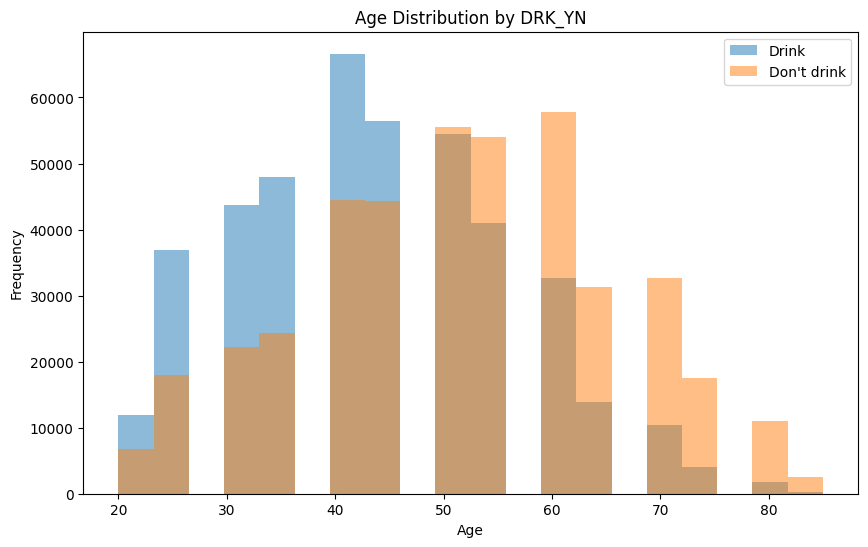

In [42]:
# Filter data based on DRK_YN values
drk_1 = df[df['DRK_YN'] == 1]
drk_2 = df[df['DRK_YN'] == 0]


# Plotting
plt.figure(figsize=(10, 6))
plt.hist(drk_1['age'], bins=20, alpha=0.5, label='Drink')
plt.hist(drk_2['age'], bins=20, alpha=0.5, label="Don't drink")

plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution by DRK_YN')
plt.legend()
plt.show()

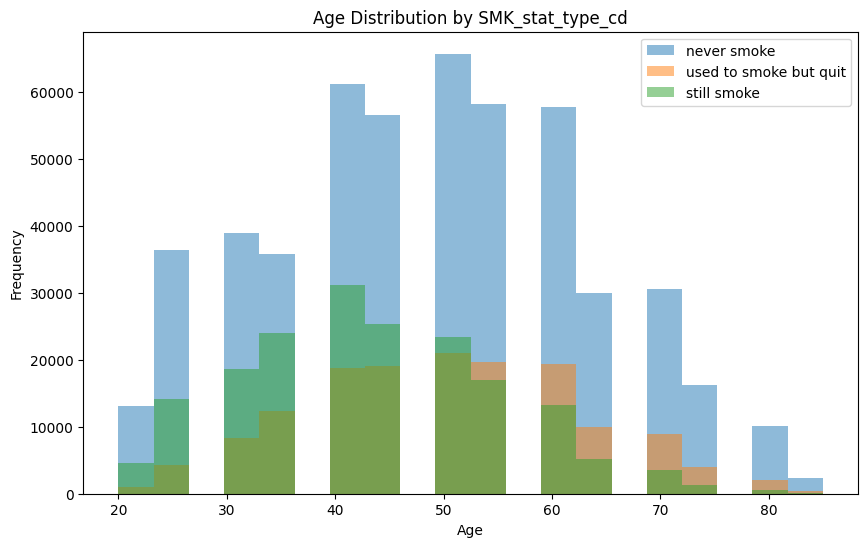

In [43]:
# Filter data based on SMK values
smk_1 = df[df['SMK_stat_type_cd'] == 1]
smk_2 = df[df['SMK_stat_type_cd'] == 2]
smk_3 = df[df['SMK_stat_type_cd'] == 3]

# Plotting
plt.figure(figsize=(10, 6))
plt.hist(smk_1['age'],bins=20, alpha=0.5, label='never smoke')
plt.hist(smk_2['age'],bins=20, alpha=0.5,label='used to smoke but quit')
plt.hist(smk_3['age'],bins=20, alpha=0.5,label='still smoke')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution by SMK_stat_type_cd')
plt.legend()
plt.show()

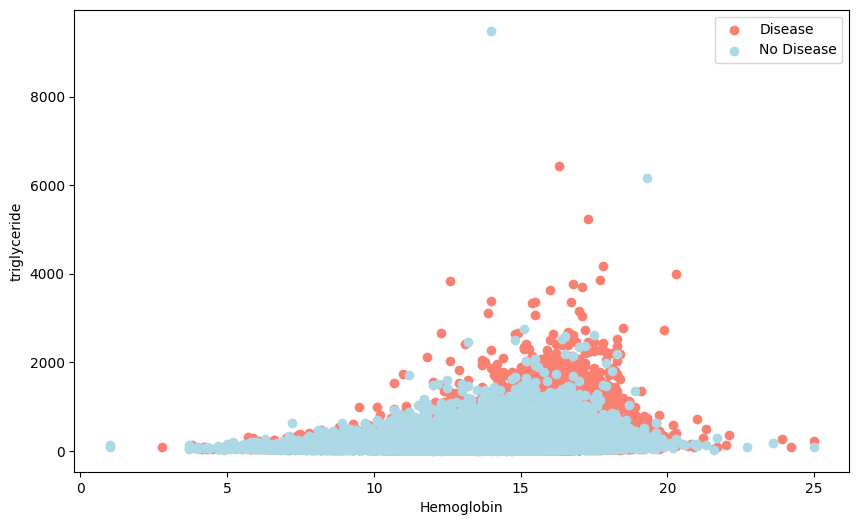

In [45]:
#Heamoglovin vs triglyceride
plt.figure(figsize=(10,6))

# Start with positve examples
plt.scatter(df.hemoglobin[df.DRK_YN==1],
            df.triglyceride[df.DRK_YN==1],
            c="salmon") # define it as a scatter figure

# Now for negative examples, we want them on the same plot, so we call plt again
plt.scatter(df.hemoglobin[df.DRK_YN==0],
            df.triglyceride[df.DRK_YN==0],
            c="lightblue") # axis always come as (x, y)

# Add some helpful info
plt.xlabel("Hemoglobin")
plt.legend(["Disease", "No Disease"])
plt.ylabel("triglyceride");

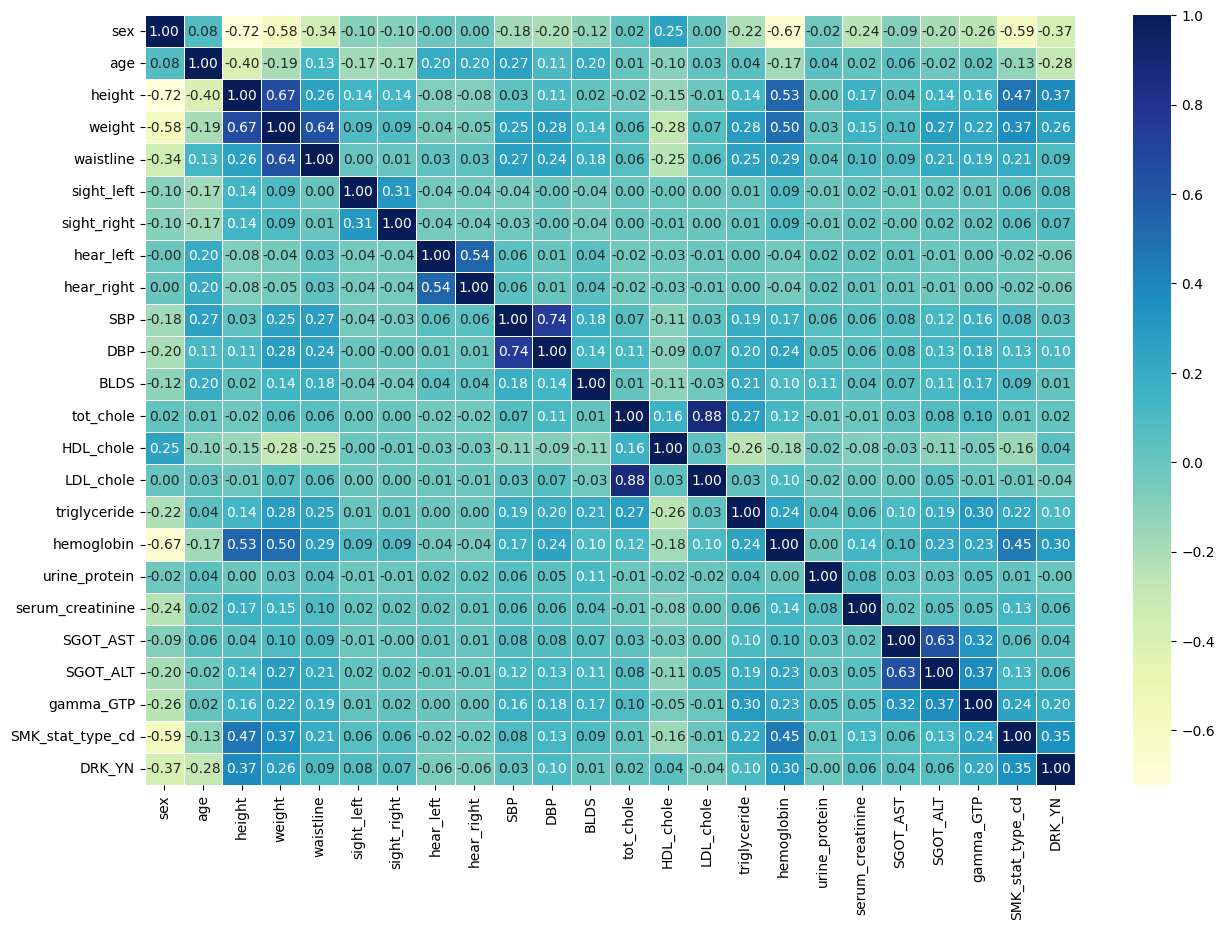

In [46]:
corr_matrix=df.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_matrix,
              annot=True,
              linewidth=0.5,
              fmt=".2f",
              cmap="YlGnBu")

##Correlated features related to drinking

In [47]:
correlation_threshold = 0.1
DRK_features = []
for feature in corr_matrix.columns:
    if feature != 'DRK_YN' and (corr_matrix[feature]['DRK_YN'] > correlation_threshold or
                                corr_matrix[feature]['DRK_YN'] < -correlation_threshold):
        DRK_features.append(feature)

print("Correlated features with 'DRK_YN':")
print(DRK_features)

Correlated features with 'DRK_YN':
['sex', 'age', 'height', 'weight', 'DBP', 'triglyceride', 'hemoglobin', 'gamma_GTP', 'SMK_stat_type_cd']


##Correlated features related to smoking

In [48]:
correlation_threshold = 0.1
SMK_features = []
for feature in corr_matrix.columns:
    if feature != 'SMK_stat_type_cd' and (corr_matrix[feature]['SMK_stat_type_cd'] > correlation_threshold or
                                corr_matrix[feature]['SMK_stat_type_cd'] < -correlation_threshold):
        SMK_features.append(feature)

print("Correlated features with SMK_stat_type_cd:")
print(SMK_features)

Correlated features with SMK_stat_type_cd:
['sex', 'age', 'height', 'weight', 'waistline', 'DBP', 'HDL_chole', 'triglyceride', 'hemoglobin', 'serum_creatinine', 'SGOT_ALT', 'gamma_GTP', 'DRK_YN']


In [50]:
x=df[DRK_features]
y=df["DRK_YN"]

##**Training models for drinkers**

##Logistic regression and support vector classifier

In [51]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2)
x_train.shape,x_test.shape,y_test.shape,y_train.shape
lgr_model = LogisticRegression(max_iter=1000, fit_intercept=False)  # Set fit_intercept=False
lgr_model.fit(x_train, y_train)

svc_model = svm.LinearSVC(max_iter=1000)
svc_model.fit(x_train, y_train)

y_pred_lgr = lgr_model.predict(x_test)
y_pred_svc = svc_model.predict(x_test)

accuracy_lgr = accuracy_score(y_test, y_pred_lgr)
accuracy_svc = accuracy_score(y_test, y_pred_svc)

print("Logistic Regression Accuracy:", accuracy_lgr)
print("SVM Accuracy:", accuracy_svc)

Logistic Regression Accuracy: 0.7117539081004264
SVM Accuracy: 0.49954405495026055


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [52]:
print(precision_score(y_test, y_pred_lgr))
print(f1_score(y_test, y_pred_lgr))
print(recall_score(y_test, y_pred_lgr))

0.7171087855926016
0.7077091201671641
0.6985526830482558


##Random forset classifier

In [53]:
model3=RandomForestClassifier()
model3.fit(x_train,y_train)
y_pred=model3.predict(x_test)
score1=accuracy_score(y_test,y_pred)
print("Accuracy for Random forest:",score1)

0.7094031264803411

##Feature importance used by model

In [54]:
feature_importances = model3.feature_importances_
importance_dict = dict(zip(x_train.columns, feature_importances))
importance_dict = dict(sorted(importance_dict.items(), key=lambda item: item[1], reverse=True))
for feature, importance in importance_dict.items():
    print(f"{feature}: {importance}")


triglyceride: 0.19141836040644147
hemoglobin: 0.16738036247885074
gamma_GTP: 0.1442910297928414
DBP: 0.13504607672211827
age: 0.09405745144562552
weight: 0.0741606279178334
height: 0.06992738764929497
SMK_stat_type_cd: 0.06379432584646415
sex: 0.05992437774053014


**Hyper Parameter tuning (Using Grid search CV)**

In [60]:
# Grid Search CV on SVC and Logistic Regression
log_reg_grid={"C":np.logspace(-4,4,30),
             "solver":["liblinear"]}

#Logictic Regression
lreg_gs=GridSearchCV(LogisticRegression(),
                     log_reg_grid,
                      cv=5,
                    verbose=True)
lreg_gs.fit(x_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [61]:
lreg_gs.best_params_

{'C': 0.0003562247890262444, 'solver': 'liblinear'}

A smaller C value suggests stronger regularization, which may help prevent overfitting.

The 'liblinear' solver is a good choice for small datasets and is well-suited for problems with binary classification.

In [62]:
p=lreg_gs.predict(x_test)
print(accuracy_score(y_test,p))
print(precision_score(y_test,p))

0.7121269540502132
0.7178605819041699


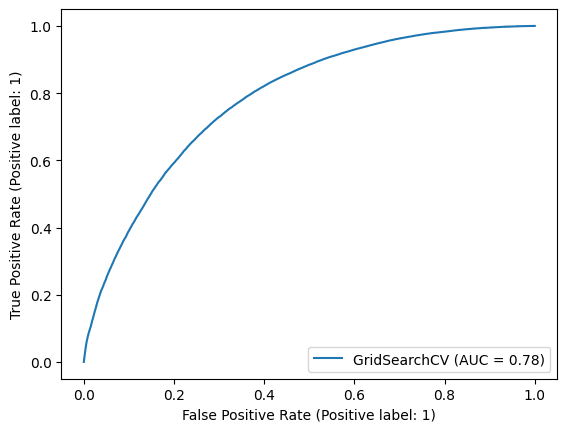

In [63]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(lreg_gs, x_test, y_test)

##**Training models for smokers**

In [65]:
x=df[SMK_features]
y=df["SMK_stat_type_cd"]
#split into test and train
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2)
x_train.shape,x_test.shape,y_test.shape,y_train.shape

((675517, 13), (168880, 13), (168880,), (675517,))

#Random forest classifier

In [66]:
model3=RandomForestClassifier()
model3.fit(x_train,y_train)
y_pred=model3.predict(x_test)
score1=accuracy_score(y_test,y_pred)
score1

0.6996980104216012

##Hyperparameter Tuning

In [ ]:
# Grid Search CV on RandomForest
param_grid = {
    'n_estimators': [100, 200],                # Number of trees in the forest
    'max_depth': [None, 10],                   # Maximum depth of the tree
    'min_samples_split': [2, 5],               # Minimum number of samples required to split an internal node
}


#Logictic Regression
lreg_gs=GridSearchCV(RandomForestClassifier(),
                     param_grid,
                     n_jobs=-1,
                      cv=2,
                    verbose=True)
lreg_gs.fit(x_train,y_train)

Fitting 2 folds for each of 8 candidates, totalling 16 fits


In [ ]:
best_params = lreg_gs.best_params_
best_score = lreg_gs.best_score_
print("Best Parameters:", best_params)
print("Best Score:", best_score)

In [ ]:
y_pred = lreg_gs.predict(x_test)
precision_micro = precision_score(y_test, y_pred, average='micro')
precision_macro = precision_score(y_test, y_pred, average='macro')
precision_weighted = precision_score(y_test, y_pred, average='weighted')

print("Precision (Micro):", precision_micro)
print("Precision (Macro):", precision_macro)
print("Precision (Weighted):", precision_weighted)


In [ ]:
y_pred = lreg_gs.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
precision_macro = precision_score(y_test, y_pred, average='micro')
recall_macro = recall_score(y_test, y_pred, average='micro')
f1_macro = f1_score(y_test, y_pred, average='micro')

print("Accuracy:", accuracy)
print("Precision (Macro):", precision_macro)
print("Recall (Macro):", recall_macro)
print("F1-score (Macro):", f1_macro)


In [ ]:
clr = classification_report(y_test, y_pred)
print(clr)
